In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

In [120]:
train_data = pd.read_csv("/Users/appke/DatascienceProjects/TCSIntership/MobileDataSets/MobileTrain.csv")
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [197]:
test_data_prediction = pd.read_csv("/Users/appke/DatascienceProjects/TCSIntership/MobileDataSets/MobileTest.csv")
test_data_prediction.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [198]:
test_data_prediction = test_data_prediction.drop('id',axis=1)

## Information of the dataset

In [121]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Description of DataSet

In [122]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Shape of the data set

In [123]:
train_data.shape

(2000, 21)

## checking null values in the data set

In [124]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Unique values

In [125]:
train_data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## Duplicate Values

In [126]:
train_data.duplicated().sum()

0

## Outlier Detection

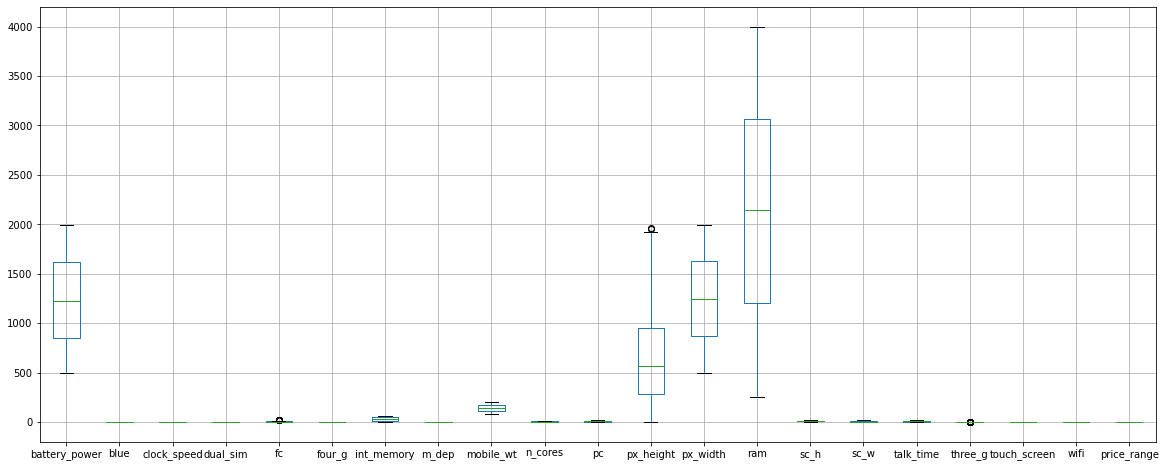

In [127]:
train_data.boxplot(figsize=(20,8))
plt.show()

In [128]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

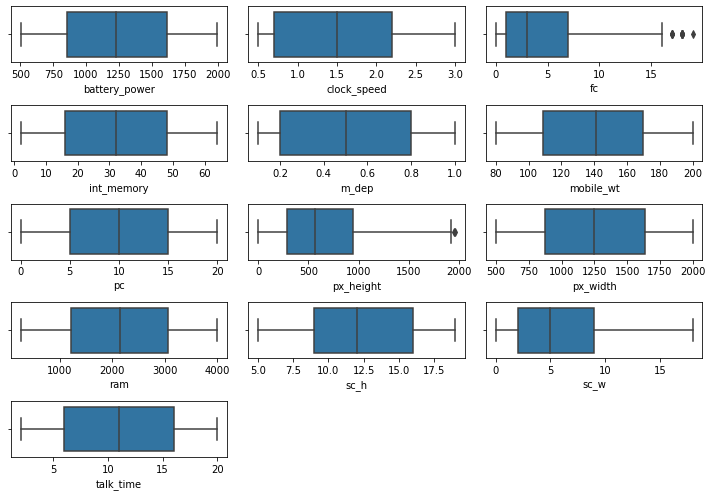

In [129]:
num_col= ['battery_power','clock_speed','fc','int_memory', 'm_dep', 'mobile_wt','pc', 'px_height','px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
plt.figure(figsize=(10, 7))
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=train_data[num_col[i]],orient='v')
    plt.tight_layout()

## Bluetooth Percentage

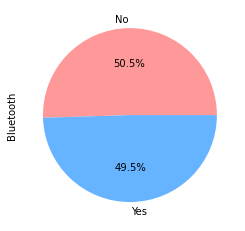

In [130]:
colors = ['#ff9999','#66b3ff']
labels=['No','Yes']
plt.figure(figsize=(5,5))
train_data['blue'].value_counts().plot(kind="pie",autopct='%1.1f%%',colors=colors,labels=labels,figsize=(4,4))
plt.ylabel('Bluetooth')
plt.show()

## 4G

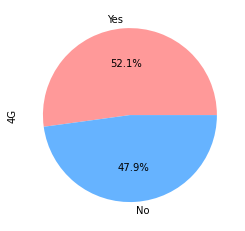

In [131]:
colors = ['#ff9999','#66b3ff']
labels=['Yes','No']
plt.figure(figsize=(5,5))
train_data['four_g'].value_counts().plot(kind="pie",autopct='%.1f%%',colors=colors,labels=labels,figsize=(4,4))
plt.ylabel('4G')
plt.show()

## 3G

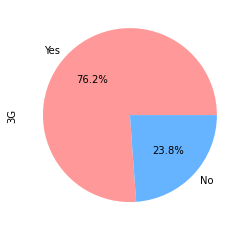

In [132]:
colors = ['#ff9999','#66b3ff']
labels=['Yes','No']
plt.figure(figsize=(5,5))
train_data['three_g'].value_counts().plot(kind="pie",autopct='%.1f%%',colors=colors,labels=labels,figsize=(4,4))
plt.ylabel('3G')
plt.show()

## Touch Screen

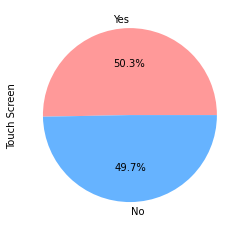

In [133]:
colors = ['#ff9999','#66b3ff']
labels=['Yes','No']
plt.figure(figsize=(5,5))
train_data['touch_screen'].value_counts().plot(kind="pie",autopct='%.1f%%',colors=colors,labels=labels,figsize=(4,4))
plt.ylabel('Touch Screen')
plt.show()

## WiFi

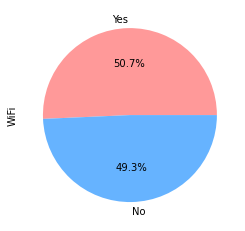

In [134]:
colors = ['#ff9999','#66b3ff']
labels=['Yes','No']
plt.figure(figsize=(5,5))
train_data['wifi'].value_counts().plot(kind="pie",autopct='%.1f%%',colors=colors,labels=labels,figsize=(4,4))
plt.ylabel('WiFi')
plt.show()

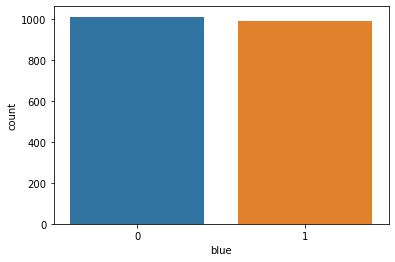

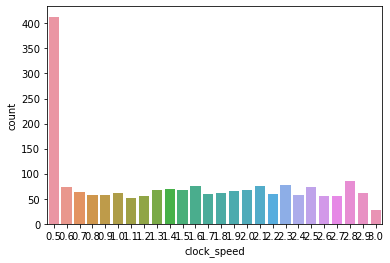

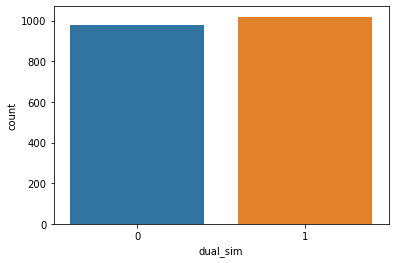

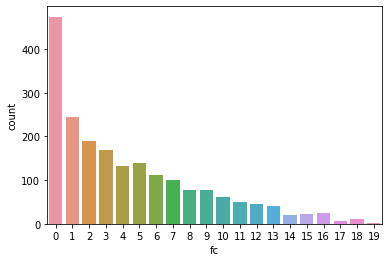

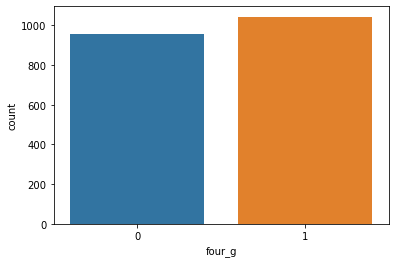

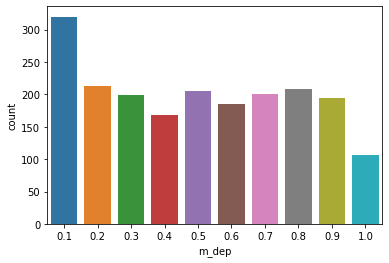

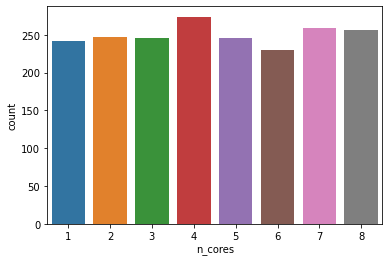

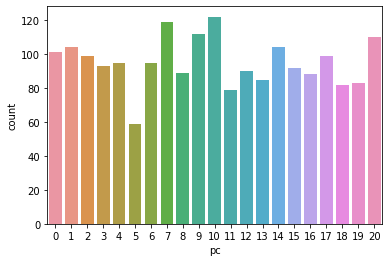

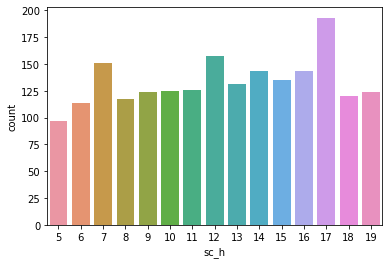

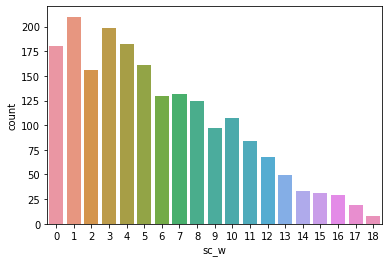

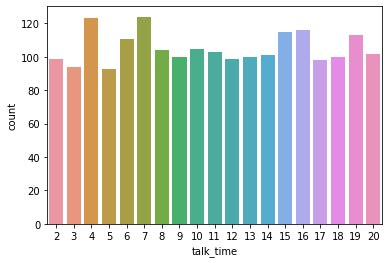

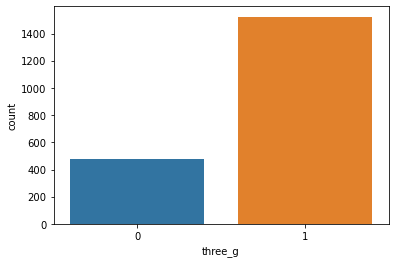

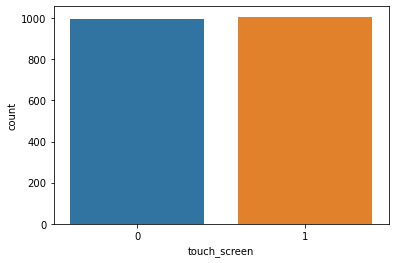

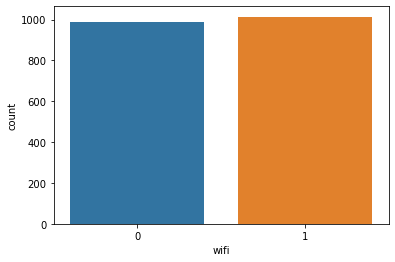

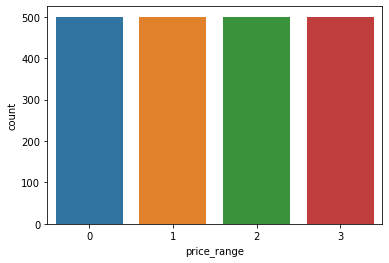

In [135]:
for i in train_data:
    if(train_data[i].nunique()<30):
        sns.countplot(x=train_data[i])
        plt.show()

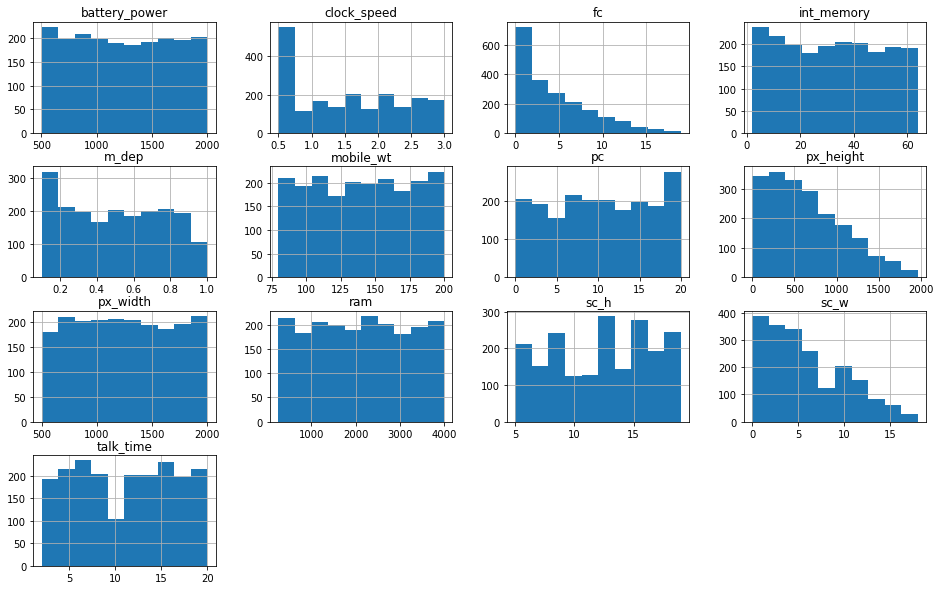

In [136]:
train_data.hist(num_col,figsize=(16,10))
plt.show()

## Correlation

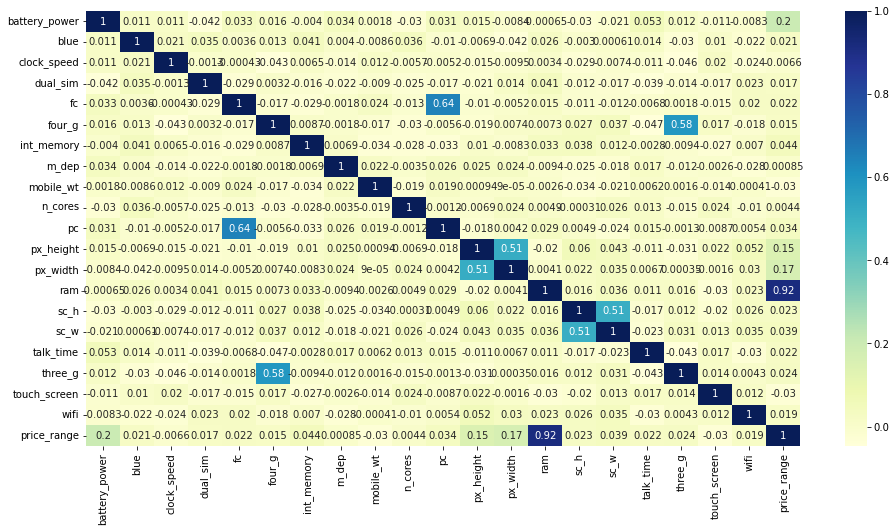

In [137]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Independent and dependent features

In [138]:
x = train_data.drop('price_range', axis=1)
y = train_data['price_range']

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=123)

In [140]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1264 to 1534
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch

## Scaling

In [141]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of the class
scaler = MinMaxScaler()
# Use the fit transform method to perform the transformation on train data
x_train.loc[:,:] = scaler.fit_transform(x_train)
## Use the fit transform method to perform the transformation on train data
x_test.loc[:,:] = scaler.transform(x_test)

In [142]:
x_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1264,0.116900,0.0,0.68,0.0,0.052632,1.0,0.596774,0.111111,0.033333,0.000000,0.25,0.440816,0.341121,0.483164,0.571429,0.388889,0.222222,1.0,0.0,0.0
722,0.437542,0.0,0.00,0.0,0.315789,0.0,0.951613,0.000000,0.075000,0.857143,0.45,0.619388,0.508678,0.411545,0.785714,0.333333,0.611111,0.0,1.0,1.0
210,0.597194,0.0,0.52,1.0,0.000000,0.0,0.338710,0.000000,0.258333,0.285714,0.05,0.108673,0.136849,0.618653,0.428571,0.000000,0.611111,1.0,0.0,1.0
252,0.138277,1.0,0.88,1.0,0.000000,1.0,0.983871,1.000000,0.958333,1.000000,0.35,0.039796,0.102804,0.511224,0.071429,0.277778,0.277778,1.0,1.0,1.0
297,0.553106,1.0,0.20,0.0,0.052632,0.0,0.806452,0.888889,0.841667,0.714286,0.10,0.537245,0.639519,0.259754,0.214286,0.333333,0.222222,1.0,0.0,1.0


## Desicion Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=3)
dt_model=dt.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [144]:
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.75


In [145]:
import sklearn.metrics as metrics
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

75.83191932214659

## Gradient Boosting Classifier

In [146]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb_model=gb.fit(x_train, y_train)
y_pred=gb_model.predict(x_test)

In [147]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.91


In [148]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

91.23824303510806

## Random Forest Classifier

In [149]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [150]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.8875


In [151]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

88.99939673567933

## XG Boost Classifier

In [152]:
import xgboost as xgb
model = xgb.XGBClassifier()
xgb_model=model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

In [153]:
print('Accuracy is: ',accuracy_score(y_test,y_pred))

Accuracy is:  0.915


In [154]:
score=100*(metrics.f1_score(y_test,y_pred,average='macro'))
score

91.72350665240987

#### XG Boost Classifier is the best model.

## Pickle File

In [155]:
X=pd.concat([x_train,x_test])
Y=pd.concat([y_train,y_test])

In [186]:
X.shape

(2000, 20)

In [188]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 1264 to 1302
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   float64
 1   blue           2000 non-null   float64
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   float64
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   float64
 17  three_g        2000 non-null   float64
 18  touch

In [157]:
gb1 = GradientBoostingClassifier(random_state=42)
gb1.fit(X,Y)

GradientBoostingClassifier(random_state=42)

In [158]:
pred=gb_model.predict(x_test)
pred

array([1, 3, 3, 1, 3, 3, 1, 0, 0, 1, 0, 1, 3, 1, 0, 3, 0, 3, 1, 1, 1, 1,
       0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 0, 1, 3, 3, 1, 2, 1, 1, 2, 3, 2, 1,
       1, 0, 0, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 0, 2, 3, 1, 0, 1, 1, 2, 2,
       0, 2, 3, 1, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 0, 3, 1, 1, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 0, 1, 3, 2, 2, 3, 0, 0, 1, 3, 2, 2, 1, 3, 0,
       3, 0, 1, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 2, 0, 0, 1, 1, 2, 2, 0,
       3, 3, 3, 0, 0, 0, 2, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 3, 1, 1, 3, 0,
       2, 0, 2, 2, 2, 3, 1, 0, 3, 3, 1, 1, 1, 2, 2, 1, 2, 3, 0, 3, 1, 2,
       3, 1, 0, 1, 0, 2, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 3, 2, 2, 2, 2, 2, 1, 0, 0, 3,
       2, 2, 2, 1, 2, 3, 2, 3, 0, 1, 2, 2, 0, 3, 3, 0, 3, 0, 3, 0, 1, 0,
       1, 2, 2, 1, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       1, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1,

In [159]:
pred=gb1.predict(x_test)
pred

array([1, 3, 3, 1, 3, 3, 1, 0, 0, 1, 0, 1, 3, 1, 1, 3, 0, 3, 2, 1, 1, 1,
       0, 3, 2, 2, 3, 2, 2, 1, 0, 1, 0, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 1,
       1, 0, 0, 2, 2, 0, 3, 1, 2, 1, 0, 2, 0, 0, 2, 3, 1, 0, 2, 1, 2, 2,
       0, 2, 3, 1, 3, 1, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 3, 2, 1, 1, 2, 0,
       0, 2, 2, 2, 1, 2, 3, 0, 0, 1, 0, 3, 2, 1, 3, 3, 1, 1, 3, 2, 3, 3,
       2, 2, 3, 2, 3, 3, 3, 0, 1, 3, 2, 2, 3, 0, 1, 1, 3, 2, 2, 1, 3, 0,
       3, 1, 1, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 2, 2, 0, 0, 1, 1, 2, 2, 0,
       3, 3, 3, 0, 0, 0, 2, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 2, 0,
       2, 0, 2, 2, 2, 3, 2, 0, 3, 3, 0, 1, 1, 2, 2, 1, 2, 3, 0, 3, 1, 2,
       3, 2, 0, 1, 0, 3, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 1, 0, 0, 1, 2, 1,
       0, 1, 1, 2, 2, 0, 3, 1, 2, 1, 0, 3, 3, 2, 1, 2, 2, 3, 1, 0, 0, 2,
       3, 2, 2, 2, 1, 3, 3, 3, 0, 1, 2, 2, 0, 2, 3, 0, 3, 0, 3, 0, 2, 0,
       1, 2, 3, 1, 3, 1, 0, 0, 1, 0, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 1, 1,
       1, 2, 2, 3, 2, 2, 2, 3, 1, 2, 2, 1, 2, 1, 1,

In [181]:
import pickle
pickle.dump(gb1,open("ranking.pkl","wb"))
pickle.dump(scaler,open('scaling_features.pkl','wb'))

In [182]:
gb_model.predict(x_train.iloc[0:4,:])

array([1, 1, 2, 1])

In [183]:
gb1.predict(x_train.iloc[0:4,:])

array([1, 1, 2, 1])

In [200]:
tst=pd.read_csv("/Users/appke/DatascienceProjects/TCSIntership/MobileDataSets/MobileTest.csv")
model = pickle.load(open("/Users/appke/DatascienceProjects/TCSIntership/ranking.pkl","rb"))
scaler = pickle.load(open("/Users/appke/DatascienceProjects/TCSIntership/scaling_features.pkl", "rb"))
input_data = scaler.transform(test_data_prediction)
print(input_data)
model.predict(input_data)

[[0.36205745 1.         0.52       ... 0.         1.         0.        ]
 [0.22712091 1.         0.         ... 1.         0.         0.        ]
 [0.87241149 1.         0.92       ... 0.         1.         1.        ]
 ...
 [0.45691383 0.         0.36       ... 1.         0.         0.        ]
 [0.68937876 1.         0.         ... 0.         1.         0.        ]
 [0.51369405 1.         0.         ... 1.         0.         1.        ]]


array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 2, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 2, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,